In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [33]:
df = pd.read_csv("uber.csv")

In [34]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [36]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [37]:
df.shape

(200000, 9)

# Preprocessing

In [38]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [40]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [41]:
df.dropna(inplace=True)

In [42]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

# Outlier Detection and Removal

(array([1.68400e+03, 1.97676e+05, 5.81000e+02, 4.10000e+01, 1.20000e+01,
        3.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-52. ,   3.1,  58.2, 113.3, 168.4, 223.5, 278.6, 333.7, 388.8,
        443.9, 499. ]),
 <BarContainer object of 10 artists>)

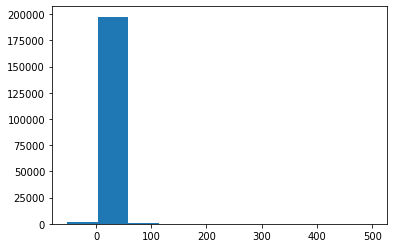

In [43]:
plt.hist(df['fare_amount'])

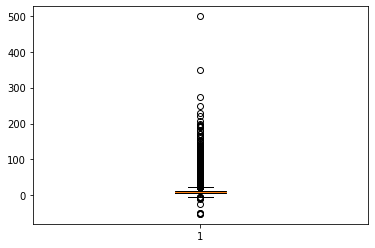

In [44]:
fig,ax = plt.subplots()
ax.boxplot(df['fare_amount'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x24792df5488>,
 'caps': [<matplotlib.lines.Line2D at 0x24792e07b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x24792df02c8>],
 'medians': [<matplotlib.lines.Line2D at 0x24792e0d948>],
 'fliers': [<matplotlib.lines.Line2D at 0x24792e0df48>],
 'means': []}

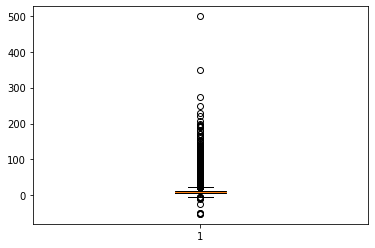

In [45]:
plt.boxplot(df['fare_amount'])

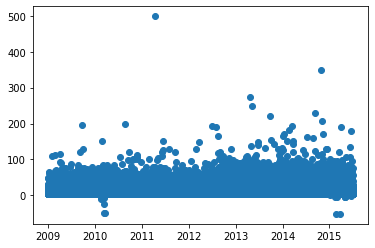

In [46]:
plt.scatter(df['pickup_datetime'],df['fare_amount'])

In [47]:
q = df["fare_amount"].quantile(0.99)

In [48]:
df[df["fare_amount"] < q]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


{'whiskers': [<matplotlib.lines.Line2D at 0x24784d4d748>,
 'caps': [<matplotlib.lines.Line2D at 0x24784de80c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x24784e41048>],
 'medians': [<matplotlib.lines.Line2D at 0x24784ddd8c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x24784e51548>],
 'means': []}

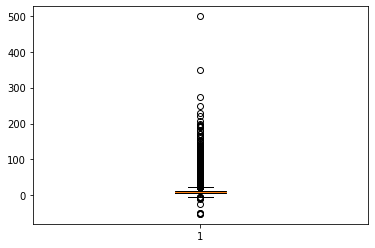

In [49]:
plt.boxplot(df['fare_amount'])

In [50]:
q_low = df["fare_amount"].quantile(0.01)
q_hi  = df["fare_amount"].quantile(0.99)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

{'whiskers': [<matplotlib.lines.Line2D at 0x247931e5808>,
 'caps': [<matplotlib.lines.Line2D at 0x247931f7a48>,
 'boxes': [<matplotlib.lines.Line2D at 0x24792e97f08>],
 'medians': [<matplotlib.lines.Line2D at 0x247931fdfc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x24792ea2688>],
 'means': []}

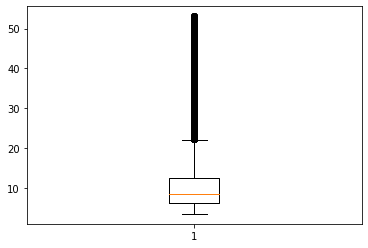

In [51]:
plt.boxplot(df['fare_amount'])

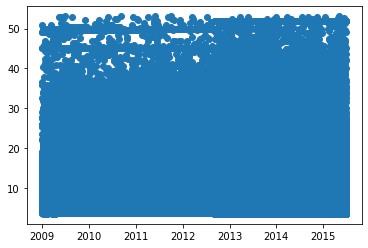

In [52]:
plt.scatter(df['pickup_datetime'],df['fare_amount'])

# Checking Correaltion

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194911 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         194911 non-null  int64              
 1   key                194911 non-null  object             
 2   fare_amount        194911 non-null  float64            
 3   pickup_datetime    194911 non-null  datetime64[ns, UTC]
 4   pickup_longitude   194911 non-null  float64            
 5   pickup_latitude    194911 non-null  float64            
 6   dropoff_longitude  194911 non-null  float64            
 7   dropoff_latitude   194911 non-null  float64            
 8   passenger_count    194911 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 14.9+ MB


In [54]:
df['fare_amount'].corr(df['passenger_count'])

0.01214469280069335

In [55]:
df.corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,-0.000339,-0.000209,-0.000028,-0.000107,0.000647,0.002241
fare_amount,-0.000339,1.000000,0.006534,-0.004843,0.006012,-0.007651,0.012145
pickup_longitude,-0.000209,0.006534,1.000000,-0.810943,0.832846,-0.846712,-0.000737
pickup_latitude,-0.000028,-0.004843,-0.810943,1.000000,-0.773097,0.697275,-0.001288
dropoff_longitude,-0.000107,0.006012,0.832846,-0.773097,1.000000,-0.914509,-0.000020
dropoff_latitude,0.000647,-0.007651,-0.846712,0.697275,-0.914509,1.000000,-0.000537
passenger_count,0.002241,0.012145,-0.000737,-0.001288,-0.000020,-0.000537,1.000000


In [56]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [57]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199994,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1
199996,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


In [58]:
df=df.drop("key",axis=1)

In [59]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199994,12.0,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


# Implementing linear Regression

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [61]:

X=df.drop("fare_amount",axis=1)
Y=df['fare_amount']

In [62]:
X['pickup_datetime'] = pd.to_numeric(X['pickup_datetime'])

In [63]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=1)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
prediction = lr.predict(x_test)

In [67]:
from sklearn.metrics import mean_squared_error
lr_rmse = np.sqrt(mean_squared_error(prediction,y_test))
print(lr_rmse)

8.026909633509021


In [68]:
print(r2_score(y_test, prediction))

0.009118034254892327


# Implementing Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=101)

In [70]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=101, verbose=0, warm_start=False)

In [71]:
rf_predictions= rf.predict(x_test)

In [72]:
rfmodel_rmse = np.sqrt(mean_squared_error(rf_predictions,y_test))
print(rfmodel_rmse)

3.490181470186031


In [73]:
print(r2_score(y_test, rf_predictions))

0.812664021246312
